In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 부산시 구별 데이터
cal = pd.read_csv('/content/busan_arts_creation_production_calculate.csv')
df = pd.DataFrame(cal)
districts = df.iloc[:, 0]

cp_index = pd.DataFrame(districts)
cp_index

,구
0,강서구
1,금정구
2,기장구
3,남구
4,동구
5,동래구
6,부산진구
7,북구
8,사상구
9,사하구


In [3]:
# 계산

cp_index['workers']=(df['workers']/df['avg_workers'])*100
cp_index['workers']=cp_index['workers'].round(2)
cp_index['groups']=(df['groups']/df['avg_groups'])*100
cp_index['applicants']=(df['applicants']/df['avg_applicants'])*100
cp_index['participants']=(cp_index['groups']+cp_index['applicants'])/2
cp_index = cp_index.drop(['groups','applicants'], axis=1)

cp_index['contents_count']=(df['contents_count']/df['avg_contents_count'])*100
cp_index['contents_held']=(df['contents_held']/df['avg_contents_held'])*100

cp_index

,구,workers,participants,contents_count,contents_held
0,강서구,128.60,100.0,100.0,100.0
1,금정구,184.80,100.0,100.0,100.0
2,기장구,131.42,100.0,100.0,100.0
3,남구,99.55,100.0,100.0,100.0
4,동구,59.57,100.0,100.0,100.0
5,동래구,123.42,100.0,100.0,100.0
6,부산진구,205.74,100.0,100.0,100.0
7,북구,77.14,100.0,100.0,100.0
8,사상구,63.63,100.0,100.0,100.0
9,사하구,64.53,100.0,100.0,100.0


In [4]:
# 인력 지수
cp_index['manpower_index'] = (cp_index['workers']+cp_index['participants'])/2
cp_index['manpower_index'] = cp_index['manpower_index'].round(2)

# 콘텐츠 지수
cp_index['contents_index'] = (cp_index['contents_count']+cp_index['contents_held'])/2

# 예술창작/생산지수
cp_index['busan_arts_creation_production_index'] = (cp_index['manpower_index']+cp_index['contents_index'])/2
cp_index['busan_arts_creation_production_index'] = cp_index['busan_arts_creation_production_index'].round(2)

cp_index

,구,workers,participants,contents_count,contents_held,manpower_index,contents_index,busan_arts_creation_production_index
0,강서구,128.60,100.0,100.0,100.0,114.30,100.0,107.15
1,금정구,184.80,100.0,100.0,100.0,142.40,100.0,121.20
2,기장구,131.42,100.0,100.0,100.0,115.71,100.0,107.85
3,남구,99.55,100.0,100.0,100.0,99.78,100.0,99.89
4,동구,59.57,100.0,100.0,100.0,79.78,100.0,89.89
5,동래구,123.42,100.0,100.0,100.0,111.71,100.0,105.85
6,부산진구,205.74,100.0,100.0,100.0,152.87,100.0,126.44
7,북구,77.14,100.0,100.0,100.0,88.57,100.0,94.28
8,사상구,63.63,100.0,100.0,100.0,81.82,100.0,90.91
9,사하구,64.53,100.0,100.0,100.0,82.26,100.0,91.13


In [5]:
cp_index['workers'].describe()

count     16.000000
mean      99.971250
std       60.302475
min       35.700000
25%       57.655000
50%       74.325000
75%      129.305000
max      221.280000
Name: workers, dtype: float64

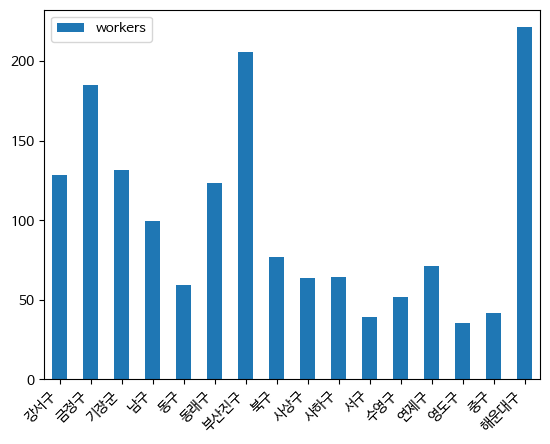

In [6]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

cp_index['workers'].plot(kind='bar')
plt.legend(['workers'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [7]:
cp_index['participants'].describe()

count     16.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: participants, dtype: float64

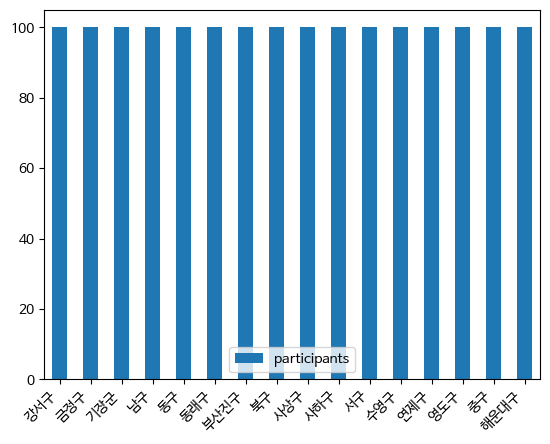

In [8]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

cp_index['participants'].plot(kind='bar')
plt.legend(['participants'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [9]:
cp_index['contents_count'].describe()

count     16.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: contents_count, dtype: float64

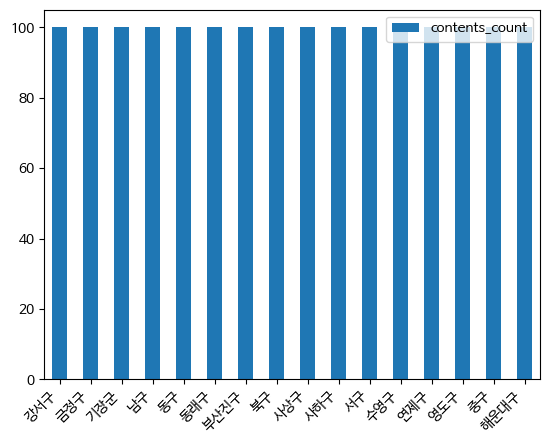

In [10]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

cp_index['contents_count'].plot(kind='bar')
plt.legend(['contents_count'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [11]:
cp_index['contents_held'].describe()

count     16.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: contents_held, dtype: float64

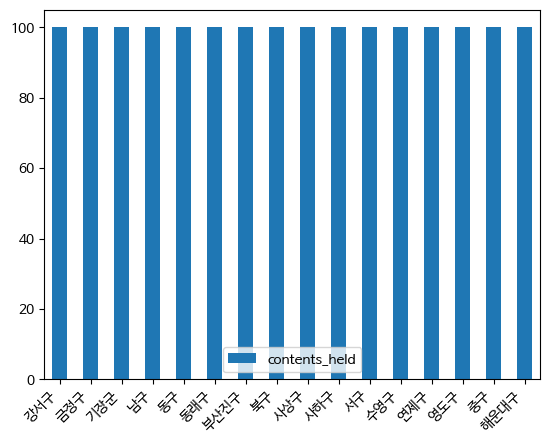

In [12]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

cp_index['contents_held'].plot(kind='bar')
plt.legend(['contents_held'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [13]:
cp_index['manpower_index'].describe()

count     16.000000
mean      99.986875
std       30.150372
min       67.850000
25%       78.825000
50%       87.165000
75%      114.652500
max      160.640000
Name: manpower_index, dtype: float64

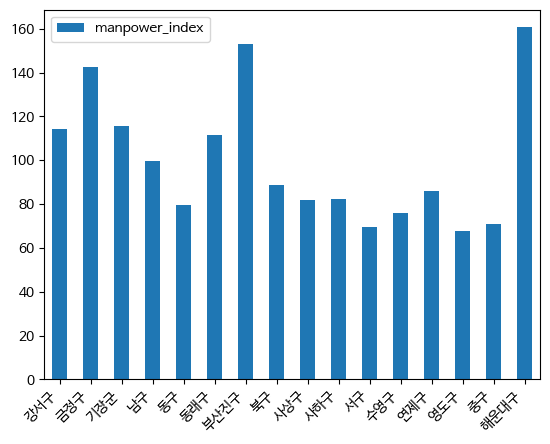

In [14]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

cp_index['manpower_index'].plot(kind='bar')
plt.legend(['manpower_index'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [15]:
cp_index['contents_index'].describe()

count     16.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: contents_index, dtype: float64

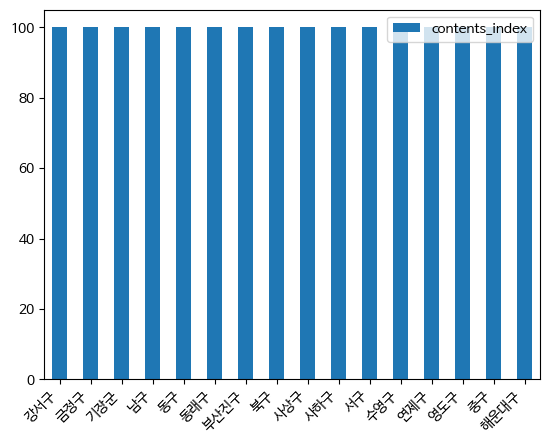

In [16]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

cp_index['contents_index'].plot(kind='bar')
plt.legend(['contents_index'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [17]:
cp_index['busan_arts_creation_production_index'].describe()

count     16.000000
mean      99.992500
std       15.075949
min       83.920000
25%       89.412500
50%       93.580000
75%      107.325000
max      130.320000
Name: busan_arts_creation_production_index, dtype: float64

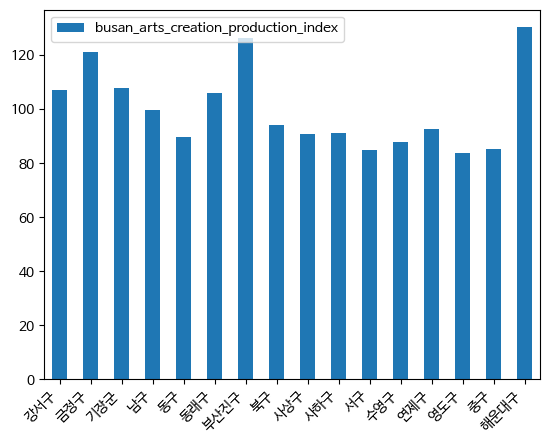

In [18]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

cp_index['busan_arts_creation_production_index'].plot(kind='bar')
plt.legend(['busan_arts_creation_production_index'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [19]:
cp_index.to_csv('busan_arts_creation_production_index.csv', encoding='utf-8-sig', index=False)